# Sleap Installation on AppStream (Windows)

This report instructs how to build a Windows image with Sleap package installed via Conda. This report is for Windows Images only.

- [Windows User Instruction](#Windows-User-Instruction)
- [Windows Build Image Instruction](#Windows-Build-Image-Instruction)


## Windows User Instruction


### Launch Sleap GUI

    sleap-label

## Windows Build Image Instructions

**Image Builder Users**

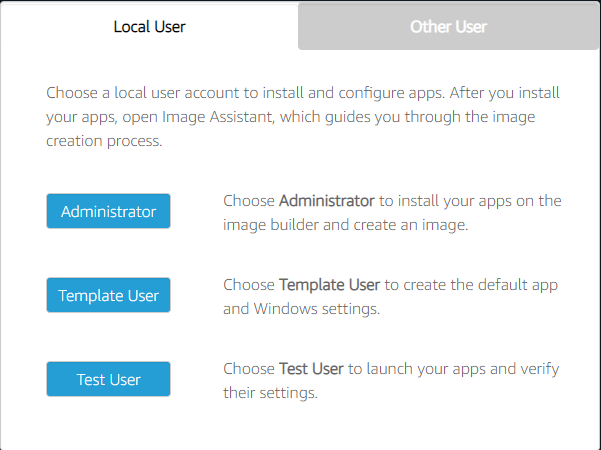

### Steps to follow 

**1. Launch Image builder with GPU support**

AWS provides some base images to start from. Since we want to install Sleap for this demo, we would like to pick an instance type that provides NVIDIA GPU support. However, these resources are limited under a quota, so we had to request for a quota increase from AWS. We will be using the latest Graphics G4 Instance family which provides NVIDIA GPU support, specifically the `stream.graphics.g4dn.xlarge` instance type which provides the lowest amount of resource (e.g. vCPU, memory). Default internet access is enabled to add Internet access to the image builder's streaming instance.

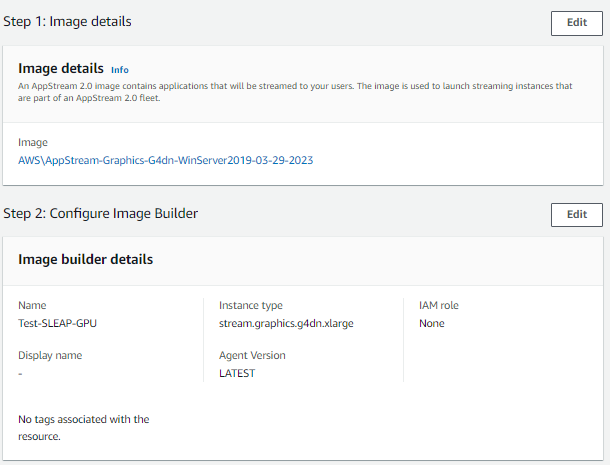

**2. (Admin user) Install Apps**

Open Firefox and download installers for the applications you would like. Launch the installers and follows the instructions. 

**Special instructions for installing Conda**: When launching the Miniconda installer, do NOT use the default install location! Instead, create a new folder called `miniconda3` directly under `:C\` and install Miniconda there. 

<div class="alert alert-block alert-warning">
<b>Beware:</b> Do not install applications under the `C:\Users` folder because other users (e.g. Template and Test users) will not have permissions to access them. This won't be a common issue since typical apps are all installed under `C:\Program Files` or `C:\Program Files (x86)`. <b>Anything that is stored directly under `C:\` should be completed as an Admin User, anything that is stored under `C:\Users\` folder should be completed as a Template User. </b>
</div>

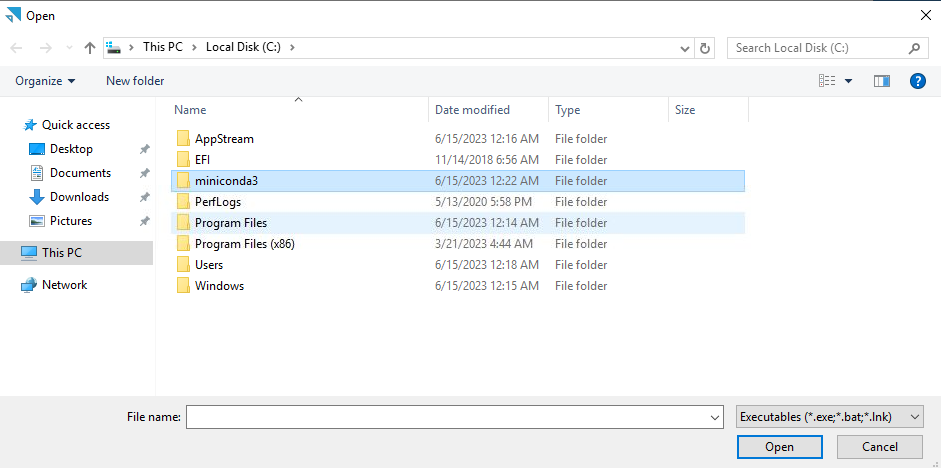

**3. (Admin User) Add App to Image**

Open Image Assistance and click Add App. For typical desktop apps like Chrome, GitBash, you would select the executable file (typically located under `:C\Program Files`, or click the Desktop shorcut icon), and the configurations would be autocompleted. However, it is trickier for conda as there is no single executable file that would launch the Anaconda Prompt automatically. I managed to find a workaround and here are the configurations that should be entered to successfully add it as an application. Essentially, it launches the Windows default Command Prompt app and runs some conda executable files to setup conda. 

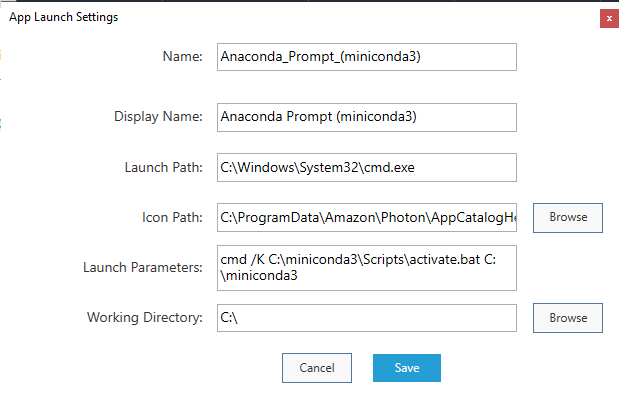

Here were the steps that I went through to obtain the workaround configurations. First, turn on show hidden files in File Explorer. Then click Add app in Image Assistance, navigate to the Start Menu shortcut of Anaconda Prompt and select the shortcut. (You may Google how to show hidden files and where the Start Menu shortcut is located if needed.) The following configurations would be generated automatically. Then, change the Launch Parameters and Working directory to match the figure above. 

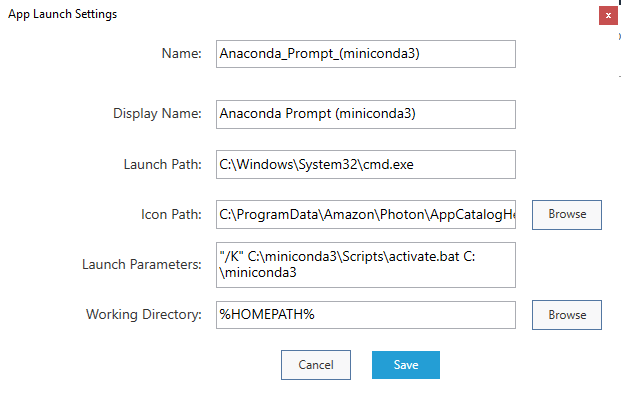

**4. (Admin User) Install Packages**

Open the Anaconda Prompt from the start menu, and start installing desired packages. 

**Sleap:** This pose estimation package is installed for the purpose of this summer project. For more detailed instructions on installing Sleap, visit the [Sleap Demo notebook](./Sleap-Demo.ipynb).

    conda update conda -y
    conda create -n sleap -c sleap -c nvidia -c conda-forge -y sleap=1.3.0

**Boto3:** This AWS SDK package for Python may be useful for users who would like to access AWS services. 

    pip install boto3

**5. (Template User) Setup default configurations for all users**

You may switch to Template user mode to create default app settings and Windows settings that would appply to all users. As a result, users who launch instances from the resulting image won't need to configure these settings themselves and can get started with the applications quickly. Default settings that you can create and configure include:

- Application preferences, including a browser home page, toolbar customizations, and security settings.
- Application data settings, including browser bookmarks and connection profiles.
- Windows experience settings, including displaying file name extensions and hidden folders.

**Set environment variable:** For this demo, we set a default environment variable for the AWS profile created by Appstream. This would simplify the work that the users have to do when accessing AWS services from their fleet instances because they wouldn't have to worry about entering a profile name everytime. The environment variables may not be immediately available as a Template User, but they will be later as a Test User. 

    setx AWS_PROFILE "appstream_machine_role"
    
**Configure Sleap:** Launch Sleap once let it set up some configuration files (e.g. `.sleap``). 
    
    (base) conda activate sleap
    (sleap) sleap-label

**6. (Admin User) Save default configureations**

Click Save Settings so that all configurations that were setup in Template User will be saved and copied to Test user. 

*P.S. If the packages were installed while in Template User mode, they would be stored under `C:\Users\DefaultProfileUser` and the save would be unsuccessful, presumably due to the lack of read / write permissions in User Data folders. Hence, packages such as SLEAP should be installed in Admin user mode along with other apps.*

**7. (Test User) Test App**

Click next and switch to Test user mode to check if the app is running properly. For this demo, we first checked that there is a sleap environment that can be activated, and check that the sleap GUI can be opened properly. 

```
conda env list
conda activate sleap
sleap-label
```

Then we ran `set | findstr 'AWS_PROFILE'` to check that the default AWS profile was set correctly.

**8. (Admin User) Optimize app launch**

This is an automated process to perform optimizations to reduce the time that it takes for the application to launch for the first time on a new fleet instance. There isn't much to do if you are using the AWS console for this step. (If using AWS CLI, you would have to specify which files to optimize for. )

Image Assistance will automatically launch the apps one by one. After each app starts, provide any required input and perform the first run experience for the app (E.g. a web browser may prompt you to import settings before it is completely up and running). Image Assistance will automatically detect the files that should be optimized. 

For this demo, I let the Image Assistance launch Anaconda Prompt and verified that the sleap GUI can be launched successfully before hitting Continue. 

```
conda env list
conda activate sleap
sleap-label
```

**9. (Admin User) Configure image details**

Complete the details for the resulting image (e.g. name, description), then click `Disconnect and Create Image`. The session will disconnect and may prompt you to retry the connection, but you can close the browser tab now. The image is being created and the image builder stats will appear as Snapshotting in the console. Once the snapshot is complete, the image builder will be stopped, and the demo image is ready for use. 